# ARTIFICIAL NEURAL NETWORK

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [27]:
df = pd.read_csv('A.csv')
del df['DATETIME']
del df['F_PU9']
del df['S_PU9']
del df['F_PU5']
del df['S_PU5']
del df['F_PU3']
del df['S_PU3']
del df['S_PU1']
df.head()

,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,F_PU2,S_PU2,...,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422,ATT_FLAG
0,2.44,5.24,3.19,4.10,2.86,5.50,4.39,93.63,93.65,1,...,70.00,28.22,85.87,21.69,82.72,21.58,71.99,39.33,29.64,0
1,2.66,4.53,3.20,4.18,3.29,5.44,4.53,89.41,89.43,1,...,87.73,24.45,84.87,29.81,86.62,29.81,59.76,42.17,26.15,0
2,3.11,3.66,3.66,4.21,3.87,5.15,3.22,89.88,89.89,1,...,89.29,23.90,87.11,29.85,87.64,29.85,58.50,42.00,25.56,0
3,3.62,3.04,4.17,4.04,3.56,4.98,2.40,88.10,88.12,1,...,91.98,27.10,68.75,31.60,64.25,31.47,72.30,43.24,28.38,0
4,4.08,2.68,4.73,3.20,3.11,5.39,3.46,87.01,87.03,1,...,92.11,26.76,68.74,32.30,64.23,32.17,72.53,44.00,28.04,0


In [28]:
df=df.dropna()

In [29]:
df.columns

Index(['L_T1', 'L_T2', 'L_T3', 'L_T4', 'L_T5', 'L_T6', 'L_T7', 'F_PU1',
       'F_PU2', 'S_PU2', 'F_PU4', 'S_PU4', 'F_PU6', 'S_PU6', 'F_PU7', 'S_PU7',
       'F_PU8', 'S_PU8', 'F_PU10', 'S_PU10', 'F_PU11', 'S_PU11', 'F_V2',
       'S_V2', 'P_J280', 'P_J269', 'P_J300', 'P_J256', 'P_J289', 'P_J415',
       'P_J302', 'P_J306', 'P_J307', 'P_J317', 'P_J14', 'P_J422', 'ATT_FLAG'],
      dtype='object')

In [30]:
df.head()

,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,F_PU2,S_PU2,...,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422,ATT_FLAG
0,2.44,5.24,3.19,4.10,2.86,5.50,4.39,93.63,93.65,1,...,70.00,28.22,85.87,21.69,82.72,21.58,71.99,39.33,29.64,0
1,2.66,4.53,3.20,4.18,3.29,5.44,4.53,89.41,89.43,1,...,87.73,24.45,84.87,29.81,86.62,29.81,59.76,42.17,26.15,0
2,3.11,3.66,3.66,4.21,3.87,5.15,3.22,89.88,89.89,1,...,89.29,23.90,87.11,29.85,87.64,29.85,58.50,42.00,25.56,0
3,3.62,3.04,4.17,4.04,3.56,4.98,2.40,88.10,88.12,1,...,91.98,27.10,68.75,31.60,64.25,31.47,72.30,43.24,28.38,0
4,4.08,2.68,4.73,3.20,3.11,5.39,3.46,87.01,87.03,1,...,92.11,26.76,68.74,32.30,64.23,32.17,72.53,44.00,28.04,0


In [31]:
x1 = df.drop(labels='ATT_FLAG', axis=1)
y1 = df.loc[:,'ATT_FLAG']

In [32]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros =RandomOverSampler(random_state=42)
x,y=ros.fit_resample(x1,y1)
print("OUR DATASET COUNT         : ", Counter(y1))
print("OVER SAMPLING DATA COUNT  : ", Counter(y))

OUR DATASET COUNT         :  Counter({0: 3685, 1: 492})
OVER SAMPLING DATA COUNT  :  Counter({0: 3685, 1: 3685})


In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)
print("NUMBER OF TRAIN DATASET    : ", len(x_train))
print("NUMBER OF TEST DATASET      : ", len(x_test))
print("TOTAL NUMBER OF DATASET    : ", len(x_train)+len(x_test))

NUMBER OF TRAIN DATASET    :  5896
NUMBER OF TEST DATASET      :  1474
TOTAL NUMBER OF DATASET    :  7370


In [34]:
print("NUMBER OF TRAIN DATASET    : ", len(y_train))
print("NUMBER OF TEST DATASET      : ", len(y_test))
print("TOTAL NUMBER OF DATASET    : ", len(y_train)+len(y_test))

NUMBER OF TRAIN DATASET    :  5896
NUMBER OF TEST DATASET      :  1474
TOTAL NUMBER OF DATASET    :  7370


In [35]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [37]:
# Create the neural network model
model = keras.Sequential([
    layers.Input(shape=x_train.shape[1]),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                2368      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4481 (17.50 KB)
Trainable params: 4481 (17.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
# Train the model
epochs = 100
batch_size = 32

In [40]:
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=1)

Epoch 1/100
148/148 [==============================] - 7s 18ms/step - loss: 0.5756 - accuracy: 0.6766 - val_loss: 0.5200 - val_accuracy: 0.7339
Epoch 2/100
148/148 [==============================] - 2s 14ms/step - loss: 0.4777 - accuracy: 0.7670 - val_loss: 0.4694 - val_accuracy: 0.7949
Epoch 3/100
148/148 [==============================] - 2s 12ms/step - loss: 0.4214 - accuracy: 0.8123 - val_loss: 0.4236 - val_accuracy: 0.8169
Epoch 4/100
148/148 [==============================] - 1s 7ms/step - loss: 0.3672 - accuracy: 0.8492 - val_loss: 0.3959 - val_accuracy: 0.8339
Epoch 5/100
148/148 [==============================] - 1s 10ms/step - loss: 0.3281 - accuracy: 0.8651 - val_loss: 0.3615 - val_accuracy: 0.8585
Epoch 6/100
148/148 [==============================] - 2s 11ms/step - loss: 0.2955 - accuracy: 0.8855 - val_loss: 0.3441 - val_accuracy: 0.8534
Epoch 7/100
148/148 [==============================] - 2s 11ms/step - loss: 0.2707 - accuracy: 0.8895 - val_loss: 0.3230 - val_accuracy: 

In [41]:
# Evaluate the model on the test data
predicted = (model.predict(x_test) > 0.5).astype("int32")  # Convert probabilities to binary labels

47/47 [==============================] - 2s 8ms/step


In [42]:
from sklearn.metrics import accuracy_score
a = accuracy_score(y_test,predicted)
print("THE ACCURACY SCORE OF ARTIFICIAL NEURAL NETWORK IS :",a*100)

THE ACCURACY SCORE OF ARTIFICIAL NEURAL NETWORK IS : 97.55766621438264


In [43]:
from sklearn.metrics import hamming_loss
hl = hamming_loss(y_test,predicted)
print("THE HAMMING LOSS OF ARTIFICIAL NEURAL NETWORK IS :",hl*100)

THE HAMMING LOSS OF ARTIFICIAL NEURAL NETWORK IS : 2.4423337856173677


In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted)
print('THE CONFUSION MATRIX SCORE OF ARTIFICIAL NEURAL NETWORK:\n\n\n',cm)

THE CONFUSION MATRIX SCORE OF ARTIFICIAL NEURAL NETWORK:


 [[708  29]
 [  7 730]]


In [45]:
from sklearn.metrics import precision_score
P = precision_score(y_test,predicted)
print('THE PRECISION SCORE OF ARTIFICIAL NEURAL NETWORK:\n\n',P*100)

THE PRECISION SCORE OF ARTIFICIAL NEURAL NETWORK:

 96.17918313570487


In [46]:
from sklearn.metrics import recall_score
R = recall_score(y_test,predicted)
print('THE RECALL SCORE OF ARTIFICIAL NEURAL NETWORK:\n\n',R*100)

THE RECALL SCORE OF ARTIFICIAL NEURAL NETWORK:

 99.05020352781547


In [47]:
from sklearn.metrics import f1_score
F = f1_score(y_test,predicted)
print('THE FI SCORE OF ARTIFICIAL NEURAL NETWORK:\n\n',F*100)

THE FI SCORE OF ARTIFICIAL NEURAL NETWORK:

 97.59358288770053


THE CONFUSION MATRIX SCORE OF ARTIFICIAL NEURAL NETWORK:


[[708  29]
 [  7 730]]


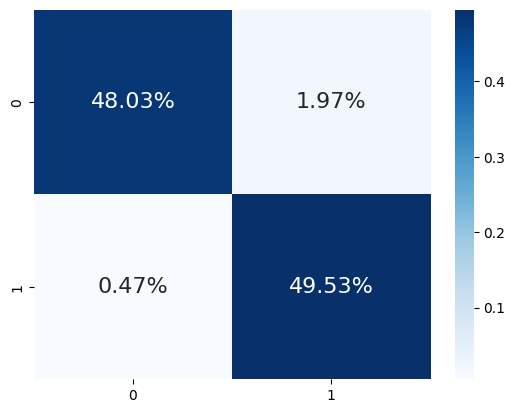

In [48]:
def plot_confusion_matrix(cm, title='THE CONFUSION MATRIX SCORE OF ARTIFICIAL NEURAL NETWORK\n\n', cmap=plt.cm.Blues):
    target_names=['']
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm=confusion_matrix(y_test, predicted)
print('THE CONFUSION MATRIX SCORE OF ARTIFICIAL NEURAL NETWORK:\n\n')
print(cm)

sns.heatmap(cm/np.sum(cm), annot=True, cmap = 'Blues', annot_kws={"size": 16},fmt='.2%')
plt.show()

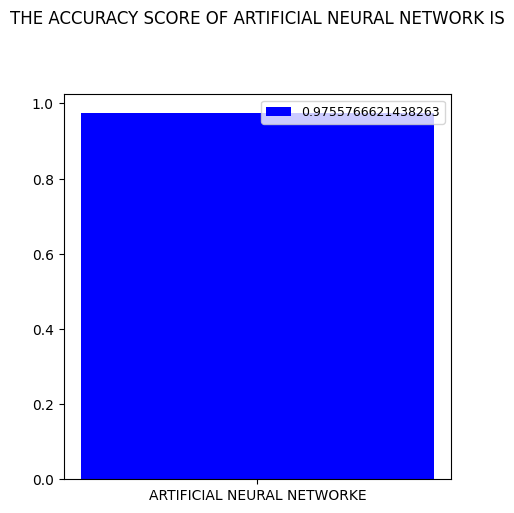

In [49]:
def graph():
    import matplotlib.pyplot as plt
    data=[a]
    alg="ARTIFICIAL NEURAL NETWORKE"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("blue"))
    plt.title("THE ACCURACY SCORE OF ARTIFICIAL NEURAL NETWORK IS\n\n\n")
    plt.legend(b,data,fontsize=9)
graph()

In [50]:
model.save("MODEL.h5")